<a href="https://colab.research.google.com/github/Khayarovde/data-science.-Ri-230946/blob/main/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import kagglehub
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

–û–ø–∏—Å–∞–Ω–∏–µ dataset:
–ö–æ–Ω—Ç–µ–∫—Å—Ç –∑–∞–¥–∞—á–∏
–ó–∞–ø–∏—Å–∏ –æ –ø—Ä–æ–¥–∞–∂–∞—Ö —Å 2011 –ø–æ 2014 –≥–æ–¥—ã, –≤–∫–ª—é—á–∞—é—â–∏–µ 3 –æ—Å–Ω–æ–≤–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–æ–≤ –∏ 17 –ø–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏–π, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã —Å –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–µ–π –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–º –∏ —Å–µ–≥–º–µ–Ω—Ç–∞–º.

–û–ø–∏—Å–∞–Ω–∏–µ –∫–ª—é—á–µ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
State (–®—Ç–∞—Ç): –®—Ç–∞—Ç, –≤ –∫–æ—Ç–æ—Ä–æ–º –ø—Ä–æ–∂–∏–≤–∞–µ—Ç –∫–ª–∏–µ–Ω—Ç (–≤–Ω—É—Ç—Ä–∏ —Å—Ç—Ä–∞–Ω—ã).

City (–ì–æ—Ä–æ–¥): –ì–æ—Ä–æ–¥ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è –∫–ª–∏–µ–Ω—Ç–∞.

Region (–†–µ–≥–∏–æ–Ω): –ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π —Ä–µ–≥–∏–æ–Ω (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ó–∞–ø–∞–¥, –Æ–≥ –∏ —Ç.–¥.).

Segment (–°–µ–≥–º–µ–Ω—Ç): –¢–∏–ø –∫–ª–∏–µ–Ω—Ç–∞/—Ä—ã–Ω–∫–∞: Consumer, Corporate, Home Office –∏ –¥—Ä.

Ship Mode (–°–ø–æ—Å–æ–± –¥–æ—Å—Ç–∞–≤–∫–∏): –ú–µ—Ç–æ–¥ –¥–æ—Å—Ç–∞–≤–∫–∏ –∑–∞–∫–∞–∑–∞ –¥–æ –∫–ª–∏–µ–Ω—Ç–∞.

Category (–ö–∞—Ç–µ–≥–æ—Ä–∏—è): –û—Å–Ω–æ–≤–Ω–∞—è –∫–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ú–µ–±–µ–ª—å, –¢–µ—Ö–Ω–∏–∫–∞).

Sub-Category (–ü–æ–¥–∫–∞—Ç–µ–≥–æ—Ä–∏—è): –ë–æ–ª–µ–µ —Ç–æ—á–Ω–∞—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–æ–≤–∞—Ä–æ–≤.

Product Name (–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ç–æ–≤–∞—Ä–∞): –ù–∞–∑–≤–∞–Ω–∏–µ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–æ–¥—É–∫—Ç–∞.

Discount (–°–∫–∏–¥–∫–∞): –°–∫–∏–¥–∫–∞, –ø—Ä–∏–º–µ–Ω—ë–Ω–Ω–∞—è –∫ —Ç–æ–≤–∞—Ä—É.

Sales (–ü—Ä–æ–¥–∞–∂–∏): –û–±—â–∞—è —Å—É–º–º–∞ –ø—Ä–æ–¥–∞–∂ –ø–æ –∑–∞–∫–∞–∑—É.

Profit (–ü—Ä–∏–±—ã–ª—å): –ü–æ–ª—É—á–µ–Ω–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –ø–æ –∑–∞–∫–∞–∑—É.

Quantity (–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ): –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –µ–¥–∏–Ω–∏—Ü —Ç–æ–≤–∞—Ä–∞ –≤ –∑–∞–∫–∞–∑–µ.

Feedback (–û—Ç–∑—ã–≤): –ü—Ä–∏–∑–Ω–∞–∫ ‚Äî –æ—Å—Ç–∞–≤–∏–ª –ª–∏ –∫–ª–∏–µ–Ω—Ç –æ—Ç–∑—ã–≤ (True/False).

In [29]:
print("–°–∫–∞—á–∏–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç —á–µ—Ä–µ–∑ kagglehub...")
path = kagglehub.dataset_download("braniac2000/retail-dataset")
print(f"–ü—É—Ç—å –∫ —Å–∫–∞—á–∞–Ω–Ω–æ–π –ø–∞–ø–∫–µ: {path}")

xlsx_path = None
for root, dirs, files in os.walk(path):
    for f in files:
        if f.endswith(".xlsx"):
            xlsx_path = os.path.join(root, f)
            break
    if xlsx_path:
        break

if xlsx_path is None:
    raise ValueError("–§–∞–π–ª .xlsx –Ω–µ –Ω–∞–π–¥–µ–Ω!")

print(f"–ò—Å–ø–æ–ª—å–∑—É–µ–º Excel-—Ñ–∞–π–ª: {xlsx_path}")

df = pd.read_excel(xlsx_path, sheet_name='Order Data')
print(f"–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: {df.shape}")


–°–∫–∞—á–∏–≤–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç —á–µ—Ä–µ–∑ kagglehub...
–ü—É—Ç—å –∫ —Å–∫–∞—á–∞–Ω–Ω–æ–π –ø–∞–ø–∫–µ: C:\Users\user\.cache\kagglehub\datasets\braniac2000\retail-dataset\versions\1
–ò—Å–ø–æ–ª—å–∑—É–µ–º Excel-—Ñ–∞–π–ª: C:\Users\user\.cache\kagglehub\datasets\braniac2000\retail-dataset\versions\1\Capstone1C_EuroMart Stores-1.xlsx
–ò—Å—Ö–æ–¥–Ω—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö: (8047, 17)


–°–∫–∞—á–∏–≤–∞–Ω–∏–µ —Ñ–∞–π–ª–∞ dataset, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–æ–≤–µ—Ä—è–µ—Ç —É—Å—Ç–∞–Ω–æ–≤–∏–ª—Å—è –ª–∏ —Ñ–∞–π–ª, –ª–∏–±–æ –∂–µ –Ω–µ—Ç.

In [30]:
# –û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å —Å—Ç—Ä–æ–∫–∏ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤ (NaN)
df_no_nan = df.dropna()

# –ü–æ–ª—É—á–∏—Ç—å –æ–ø–∏—Å–∞—Ç–µ–ª—å–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º
desc_no_nan = df_no_nan.describe(include='all')

# –ü–æ–∫–∞–∑–∞—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç
num_non_null_rows = df.dropna().shape[0]

print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {num_non_null_rows}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –±–µ–∑ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 8047


–û—á–∏—Å—Ç–∫–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç, —Ç.–∫. —Ä–µ—à–∏–ª —É–±—Ä–∞—Ç—å –ø–æ –ø—Ä–∏—á–∏–Ω–µ —Ç–æ–≥–æ, —á—Ç–æ –Ω–µ null —Å—Ç—Ä–æ–∫.

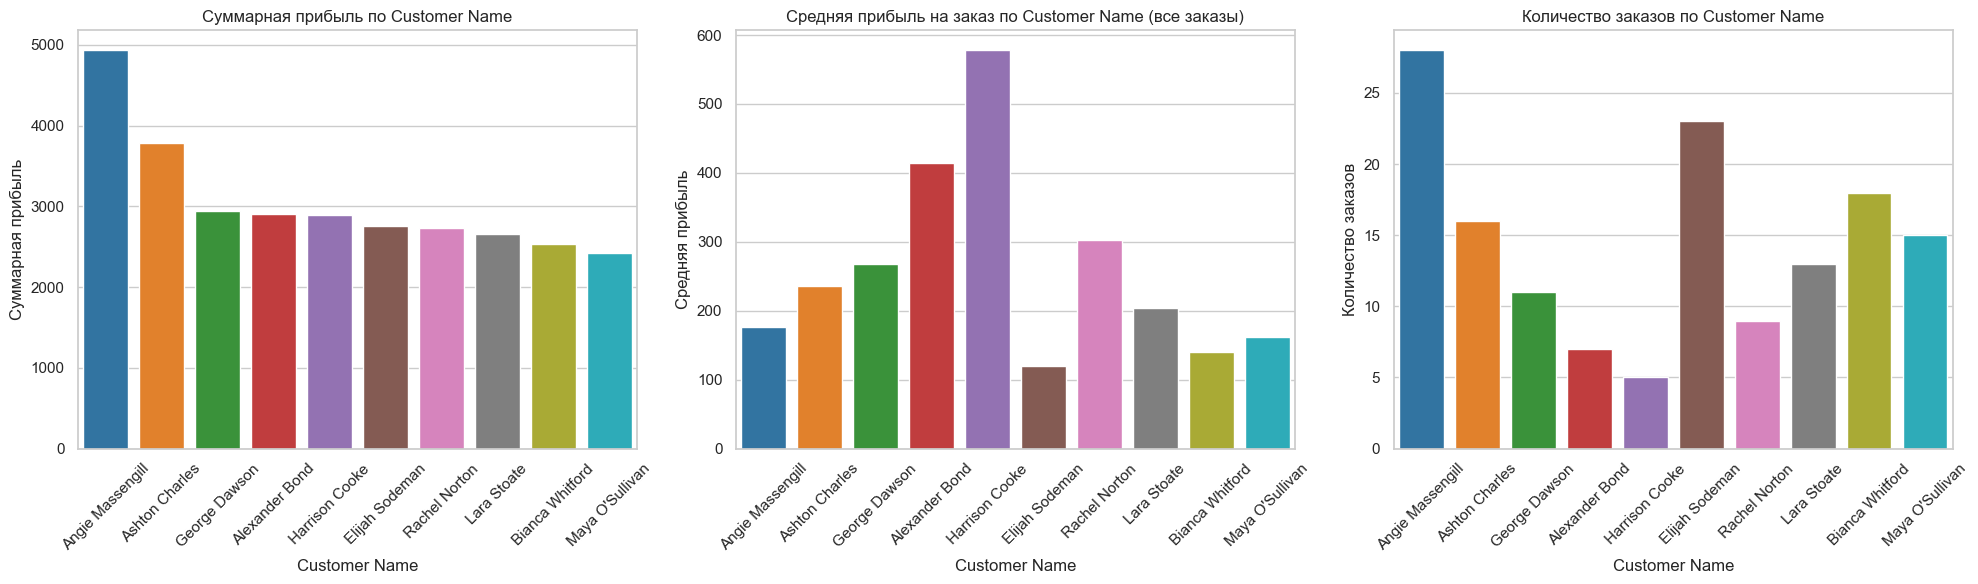


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Customer Name


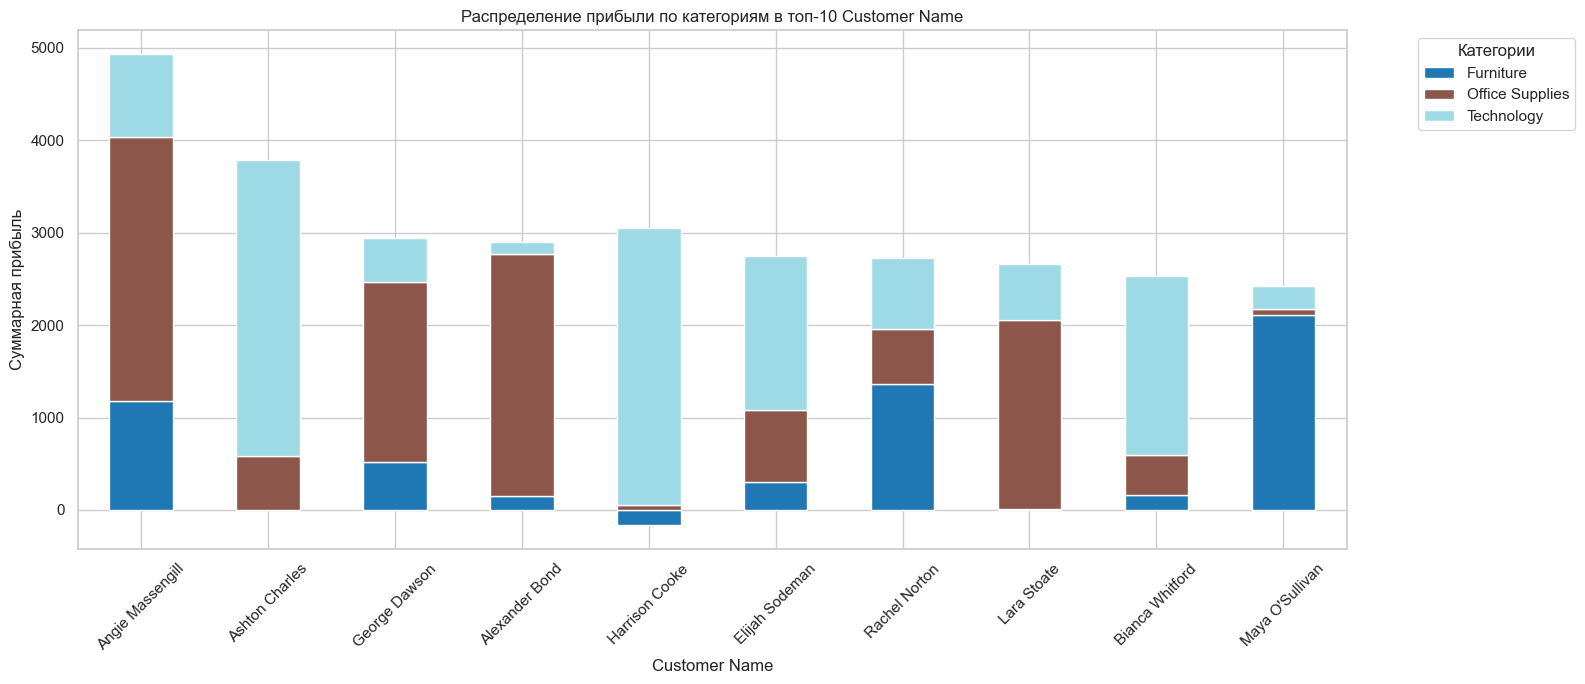


üí° –í—ã–≤–æ–¥ –ø–æ 'Customer Name':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Angie Massengill' ‚Äî 4 932
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Maya O'Sullivan' ‚Äî 2 418
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 119.65 –¥–æ 577.80
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 125.36 –¥–æ 1023.33
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Customer Name' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 5 –¥–æ 28
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Customer Name':
  ‚Ä¢ Angie Massengill: 3.57%
  ‚Ä¢ Ashton Charles: 12.50%
  ‚Ä¢ George Dawson: 18.18%
  ‚Ä¢ Alexander Bond: 0.00%
  ‚Ä¢ Harrison Cooke: 40.00%
  ‚Ä¢ Elijah Sodeman: 4.35%
  ‚Ä¢ Rachel Norton: 11.11%
  ‚Ä¢ Lara Stoate: 7.69%
  ‚Ä¢ Bianca Whitford: 5.56%
  ‚Ä¢ Maya O'Sullivan: 6.67%


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

def analyze_profit_by_category(df, col, top_n=10):
    # –°—á–∏—Ç–∞–µ–º —Å—É–º–º–∞—Ä–Ω—É—é –ø—Ä–∏–±—ã–ª—å –ø–æ –≤—Å–µ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º (–≤–∫–ª—é—á–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ)
    total_profit = df.groupby(col)['Profit'].sum()

    # –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ø-N –∑–Ω–∞—á–µ–Ω–∏–π —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π —Å—É–º–º–∞—Ä–Ω–æ–π –ø—Ä–∏–±—ã–ª—å—é (–ø–æ —É–±—ã–≤–∞–Ω–∏—é)
    top_vals = total_profit.sort_values(ascending=False).head(top_n).index.tolist()

    # –§–∏–ª—å—Ç—Ä—É–µ–º –∏—Å—Ö–æ–¥–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –ø–æ —Ç–æ–ø-N
    df_top = df[df[col].isin(top_vals)].copy()

    # –°—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏ –ø–æ –≤—Å–µ–º –∑–∞–∫–∞–∑–∞–º (–≤–∫–ª—é—á–∞—è –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ)
    profit_sum = df_top.groupby(col)['Profit'].sum().reindex(top_vals)
    avg_profit_all = df_top.groupby(col)['Profit'].mean().reindex(top_vals)

    # –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å —Ç–æ–ª—å–∫–æ –ø–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–º –∑–∞–∫–∞–∑–∞–º (–¥–ª—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏)
    avg_profit_positive = df_top[df_top['Profit'] > 0].groupby(col)['Profit'].mean().reindex(top_vals)

    order_count = df_top.groupby(col).size().reindex(top_vals)

    # –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤
    loss_counts = df_top[df_top['Profit'] < 0].groupby(col).size().reindex(top_vals).fillna(0)
    loss_percent = (loss_counts / order_count * 100).fillna(0)

    # –¶–≤–µ—Ç–∞ –¥–ª—è —Ç–æ–ø–æ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    palette = sns.color_palette("tab10", n_colors=len(top_vals))
    color_dict = dict(zip(top_vals, palette))

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # –°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å
    sns.barplot(x=profit_sum.index, y=profit_sum.values, palette=[color_dict[x] for x in profit_sum.index], ax=axes[0])
    axes[0].set_title(f"–°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –ø–æ {col}")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("–°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å")
    axes[0].tick_params(axis='x', rotation=45)

    # –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å (–≤—Å–µ –∑–∞–∫–∞–∑—ã)
    sns.barplot(x=avg_profit_all.index, y=avg_profit_all.values, palette=[color_dict[x] for x in avg_profit_all.index], ax=axes[1])
    axes[1].set_title(f"–°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ –ø–æ {col} (–≤—Å–µ –∑–∞–∫–∞–∑—ã)")
    axes[1].set_xlabel(col)
    axes[1].set_ylabel("–°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å")
    axes[1].tick_params(axis='x', rotation=45)

    # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤
    sns.barplot(x=order_count.index, y=order_count.values, palette=[color_dict[x] for x in order_count.index], ax=axes[2])
    axes[2].set_title(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –ø–æ {col}")
    axes[2].set_xlabel(col)
    axes[2].set_ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤")
    axes[2].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
    print(f"\nüìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-{top_n} {col}")
    profit_by_cat = df_top.groupby([col, 'Category'])['Profit'].sum().unstack(fill_value=0).reindex(top_vals)

    profit_by_cat.plot(kind='bar', stacked=True, figsize=(16, 7), colormap='tab20')
    plt.title(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤ —Ç–æ–ø-{top_n} {col}")
    plt.xlabel(col)
    plt.ylabel("–°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å")
    plt.xticks(rotation=45)
    plt.legend(title='–ö–∞—Ç–µ–≥–æ—Ä–∏–∏', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    best_sum_profit = profit_sum.idxmax()
    worst_sum_profit = profit_sum.idxmin()

    def fmt_int(n):
        return f"{int(n):,}".replace(",", " ")

    def fmt_float(n):
        return f"{n:.2f}"

    print(f"\nüí° –í—ã–≤–æ–¥ –ø–æ '{col}':")
    print(f"- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É '{best_sum_profit}' ‚Äî {fmt_int(profit_sum.max())}")
    print(f"- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É '{worst_sum_profit}' ‚Äî {fmt_int(profit_sum.min())}")
    print(f"- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç {fmt_float(avg_profit_all.min())} –¥–æ {fmt_float(avg_profit_all.max())}")
    print(f"- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç {fmt_float(avg_profit_positive.min())} –¥–æ {fmt_float(avg_profit_positive.max())}")
    print(f"- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-{top_n} '{col}' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç {fmt_int(order_count.min())} –¥–æ {fmt_int(order_count.max())}")
    print(f"- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-{top_n} '{col}':")
    for val in top_vals:
        print(f"  ‚Ä¢ {val}: {fmt_float(loss_percent[val])}%")


analyze_profit_by_category(df, 'Customer Name')



–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –∫–æ–Ω—Ü–µ–Ω—Ç—Ä–∏—Ä—É–µ—Ç—Å—è —É –Ω–µ–±–æ–ª—å—à–æ–≥–æ —á–∏—Å–ª–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –∑–∞–∫–∞–∑–æ–≤ –∏ –≤—ã—Å–æ–∫–æ–π —Å—Ä–µ–¥–Ω–µ–π –ø—Ä–∏–±—ã–ª—å—é. –ü—Ä–∏ —ç—Ç–æ–º —É –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤, —á—Ç–æ –º–æ–∂–µ—Ç –Ω–∞ –∞–∫—Ü–∏–∏ –∏–ª–∏ —Å–∫–∏–¥–∫–∏, –ª–∏–±–æ –Ω–∞ –ø—Ä–æ—Ü–µ–Ω—Ç –≤–æ–∑–≤—Ä–∞—Ç–æ–≤.

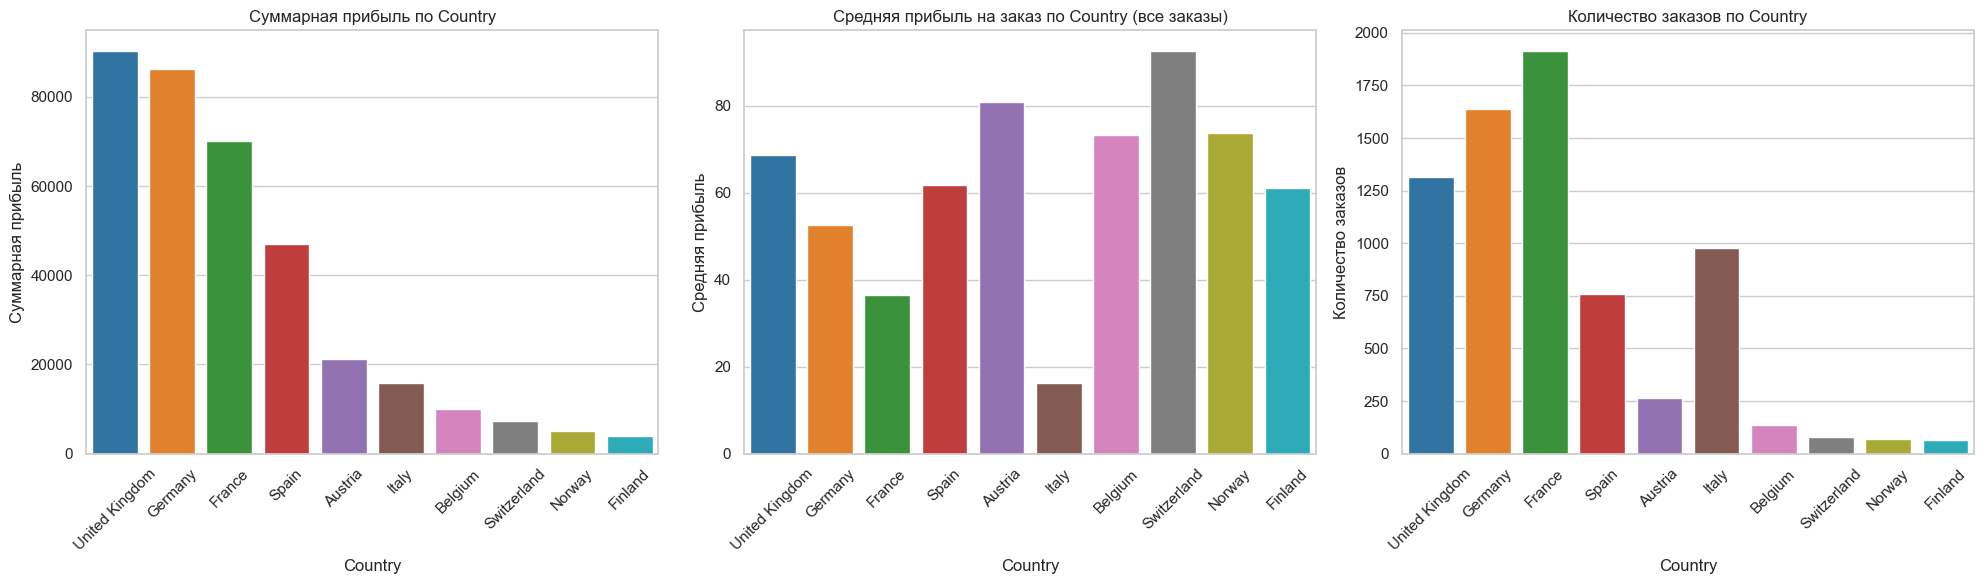


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Country


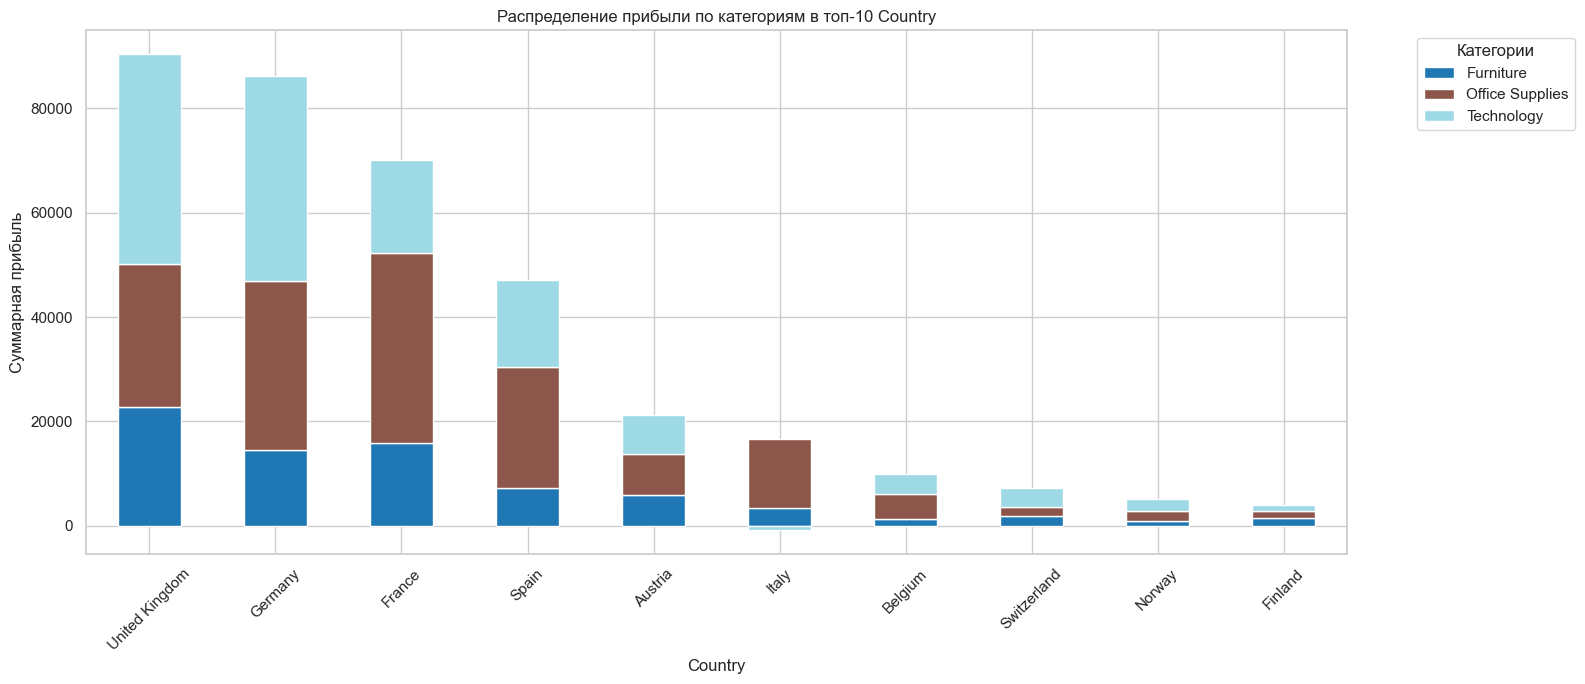


üí° –í—ã–≤–æ–¥ –ø–æ 'Country':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'United Kingdom' ‚Äî 90 382
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Finland' ‚Äî 3 908
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 16.14 –¥–æ 92.74
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 62.03 –¥–æ 95.18
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Country' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 64 –¥–æ 1 916
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Country':
  ‚Ä¢ United Kingdom: 13.09%
  ‚Ä¢ Germany: 10.43%
  ‚Ä¢ France: 15.66%
  ‚Ä¢ Spain: 9.99%
  ‚Ä¢ Austria: 0.00%
  ‚Ä¢ Italy: 23.70%
  ‚Ä¢ Belgium: 0.00%
  ‚Ä¢ Switzerland: 0.00%
  ‚Ä¢ Norway: 0.00%
  ‚Ä¢ Finland: 0.00%


In [32]:
analyze_profit_by_category(df, 'Country')

–ö–∞–∫ –≤–∏–¥–Ω–æ, –æ—Å–Ω–æ–≤–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –ø–æ—Å—Ç—É–ø–∞–µ—Ç –∏–∑ –∫—Ä—É–ø–Ω—ã—Ö –≥–æ—Ä–æ–¥–æ–≤ —Å —Ä–∞–∑–≤–∏—Ç–æ–π —ç–∫–æ–Ω–æ–º–∏–∫–æ–π. –ü—Ä–∏ —ç—Ç–æ–º —Å–ø—Ä–æ—Å —Ä–∞–∑–¥–µ–ª—ë–Ω –Ω–µ –æ–¥–Ω–æ—Ä–æ–¥–Ω–æ, —Ç–∞–∫ –º–Ω–æ–≥–∏–µ —Å—Ç—Ä–∞–Ω—ã –∏–º–µ–ª–∏ –Ω–∏–∑–∫—É—é –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å, –Ω–æ —Å–∫–æ—Ä–µ–µ –≤—ã–∑–≤–∞–Ω–æ —Ç–µ–º, —á—Ç–æ —á–∞—Å—Ç—å —Ç–æ–≤–∞—Ä–æ–≤ –Ω–µ –±—ã–ª–æ, –∞ —Å –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã –≤ –±–æ–ª–µ–µ —Ä–∞–∑–≤–∏—Ç—ã—Ö —Å—Ç—Ä–∞–Ω–∞—Ö –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –±–æ–ª—å—à–∏—Ö –ø—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤

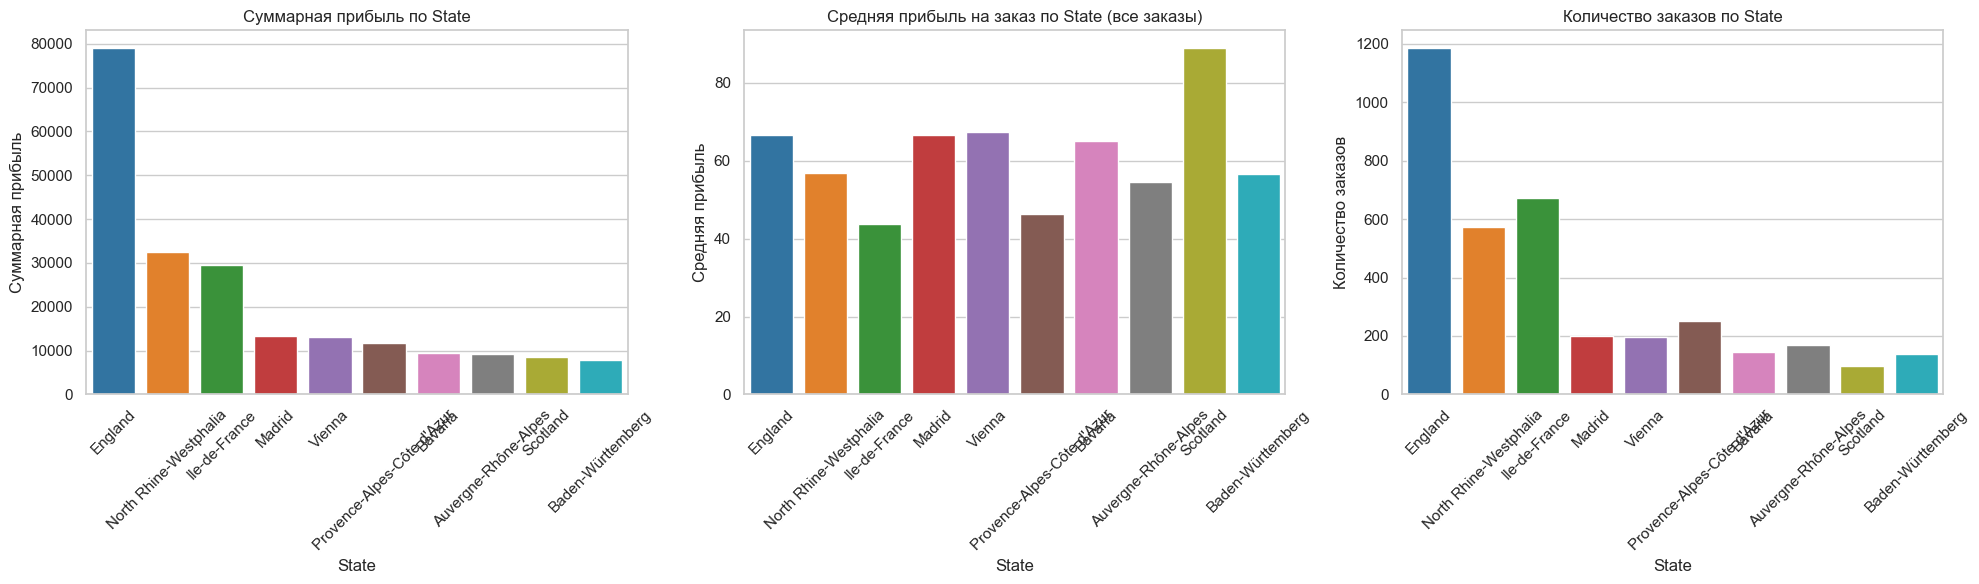


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 State


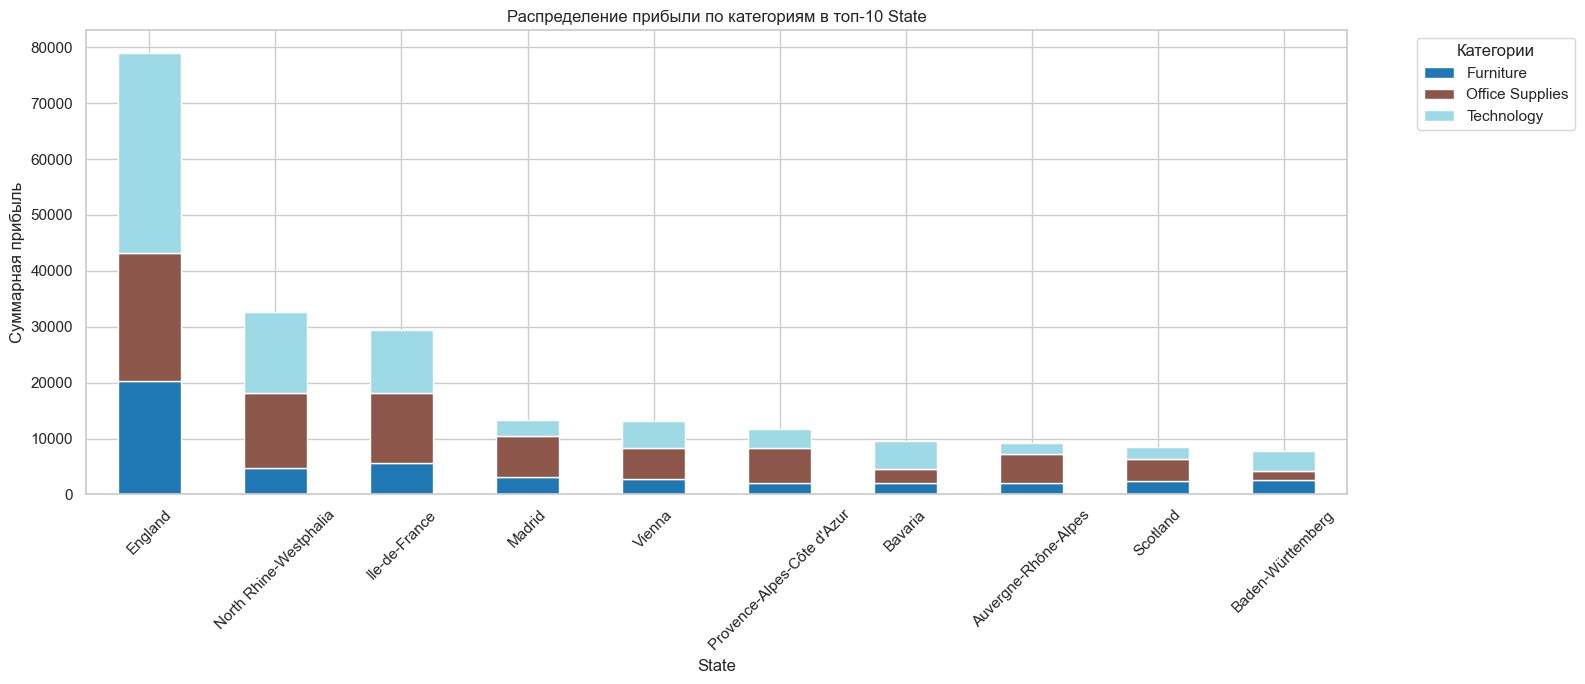


üí° –í—ã–≤–æ–¥ –ø–æ 'State':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'England' ‚Äî 79 069
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Baden-W√ºrttemberg' ‚Äî 7 762
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 43.77 –¥–æ 89.05
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 62.02 –¥–æ 96.03
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'State' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 96 –¥–æ 1 187
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'State':
  ‚Ä¢ England: 14.15%
  ‚Ä¢ North Rhine-Westphalia: 6.29%
  ‚Ä¢ Ile-de-France: 11.14%
  ‚Ä¢ Madrid: 8.54%
  ‚Ä¢ Vienna: 0.00%
  ‚Ä¢ Provence-Alpes-C√¥te d'Azur: 13.60%
  ‚Ä¢ Bavaria: 6.85%
  ‚Ä¢ Auvergne-Rh√¥ne-Alpes: 14.71%
  ‚Ä¢ Scotland: 3.12%
  ‚Ä¢ Baden-W√ºrttemberg: 7.30%


In [33]:
analyze_profit_by_category(df, 'State')

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–µ–Ω—ã –≤ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏ —Ä–∞–∑–≤–∏—Ç—ã—Ö —à—Ç–∞—Ç–∞—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, England). –í—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —à—Ç–∞—Ç–∞—Ö —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å–Ω–∏–∂–µ–Ω–∏–µ –º–∞—Ä–∂–∏–Ω–∞–ª—å–Ω–æ—Å—Ç–∏, –≤–æ–∑–º–æ–∂–Ω–æ –∏–∑-–∑–∞ —Å–∫–∏–¥–æ–∫ –∏–ª–∏ –≤–æ–∑–≤—Ä–∞—Ç–æ–≤.

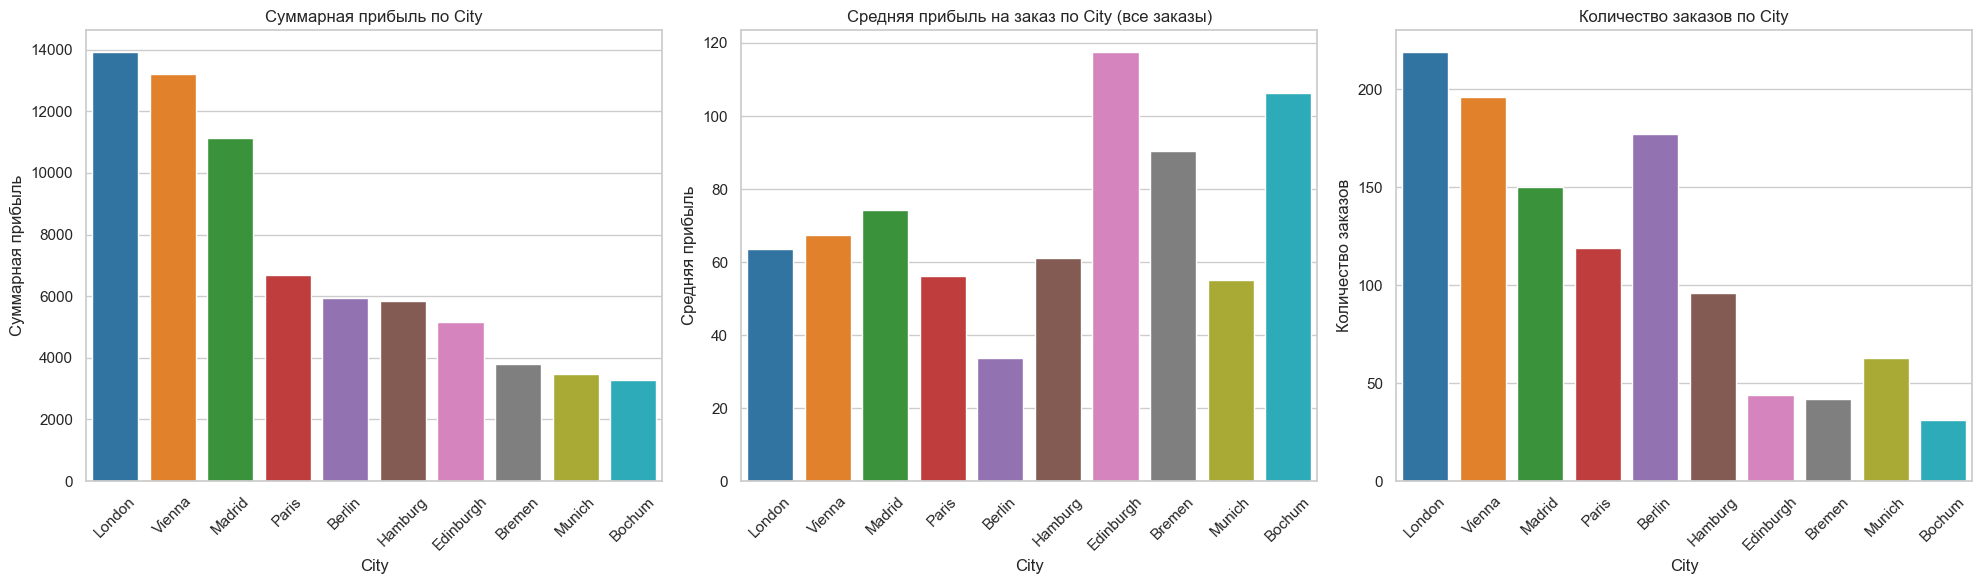


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 City


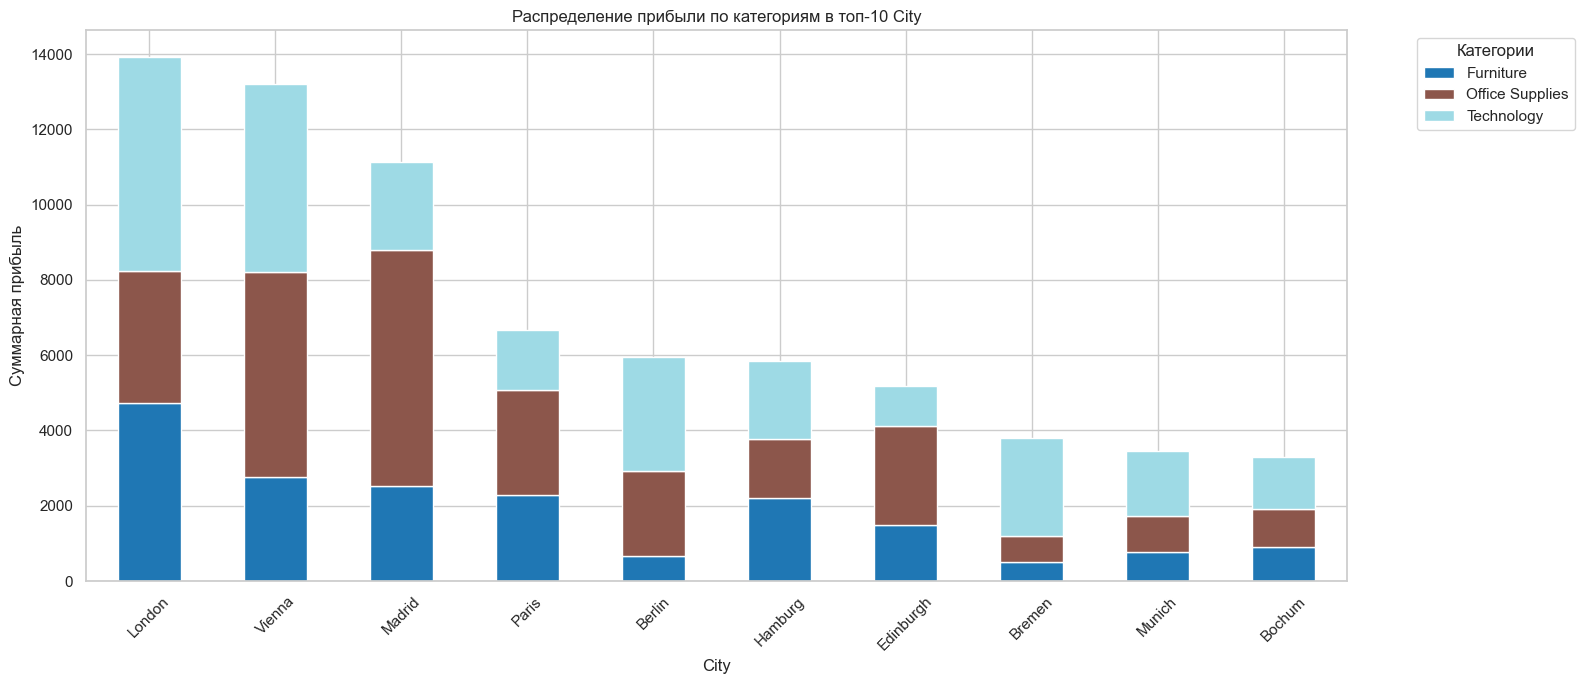


üí° –í—ã–≤–æ–¥ –ø–æ 'City':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'London' ‚Äî 13 931
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Bochum' ‚Äî 3 295
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 33.57 –¥–æ 117.57
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 59.06 –¥–æ 131.35
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'City' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 31 –¥–æ 219
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'City':
  ‚Ä¢ London: 17.35%
  ‚Ä¢ Vienna: 0.00%
  ‚Ä¢ Madrid: 8.67%
  ‚Ä¢ Paris: 11.76%
  ‚Ä¢ Berlin: 22.03%
  ‚Ä¢ Hamburg: 1.04%
  ‚Ä¢ Edinburgh: 4.55%
  ‚Ä¢ Bremen: 4.76%
  ‚Ä¢ Munich: 4.76%
  ‚Ä¢ Bochum: 6.45%


In [34]:
analyze_profit_by_category(df, 'City')

–ö–∞–∫ –≤–∏–¥–Ω–æ, –æ—Å–Ω–æ–≤–Ω—ã–µ –∑–∞–∫–∞–∑—ã –ø–æ—Å—Ç—É–ø–∞—é—Ç –∏–∑ –≥–æ—Ä–æ–¥–æ–≤ —Å –≤—ã—Å–æ–∫–æ–π —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–π –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç—å—é. –ü—Ä–∏ —ç—Ç–æ–º —Å–ø—Ä–æ—Å –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º —Ç–æ–≤–∞—Ä–æ–≤ –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è: –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –ø—Ä–µ–æ–±–ª–∞–¥–∞–µ—Ç –ø–æ–∫—É–ø–∫–∞ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–Ω—ã—Ö —Ç–æ–≤–∞—Ä–æ–≤, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤ –¥—Ä—É–≥–∏—Ö —Å–ø—Ä–æ—Å –Ω–∞ –¥—Ä—É–≥–∏–µ —Ç–æ–≤–∞—Ä—ã.


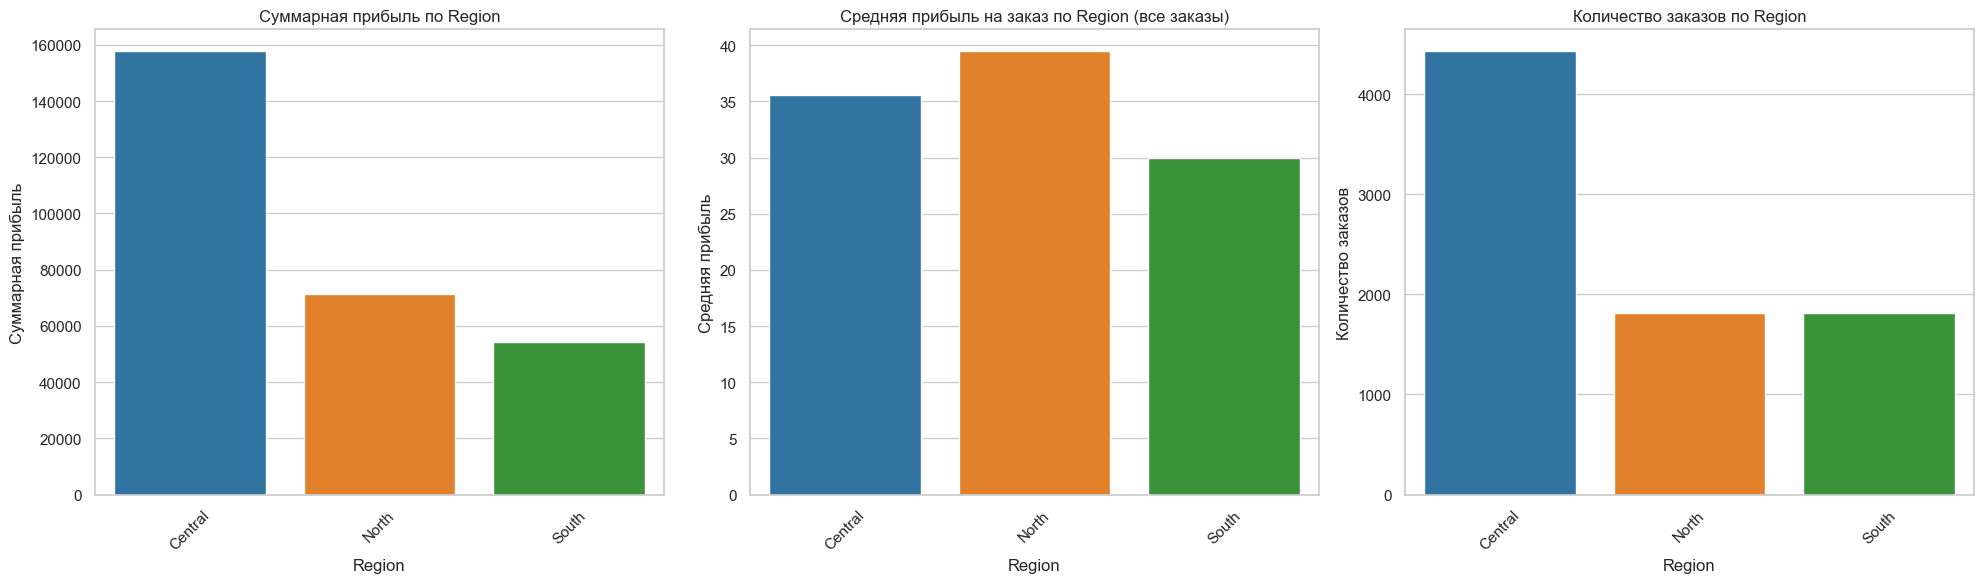


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Region



üí° –í—ã–≤–æ–¥ –ø–æ 'Region':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Central' ‚Äî 157 636
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'South' ‚Äî 54 165
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 29.93 –¥–æ 39.45
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 68.35 –¥–æ 87.67
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Region' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 1 810 –¥–æ 4 426
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Region':
  ‚Ä¢ Central: 18.84%
  ‚Ä¢ North: 28.93%
  ‚Ä¢ South: 20.77%


In [35]:
analyze_profit_by_category(df, 'Region')

–¶–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–µ —Ä–∞–π–æ–Ω—ã –ø—Ä–∏–Ω–æ—Å—è—Ç –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –ø—Ä–∏–±—ã–ª—å –ø—Ä–∏ —É–º–µ—Ä–µ–Ω–Ω–æ–º —É—Ä–æ–≤–Ω–µ —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤. –Æ–∂–Ω—ã–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é –ø—Ä–∏–±—ã–ª—å —Å –ø–æ—Ö–æ–∂–∏–º —É—Ä–æ–≤–Ω–µ–º —É–±—ã—Ç–∫–æ–≤. –í –°–µ–≤–µ—Ä–Ω—ã–π –≤—ã—Å–æ–∫–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ —Å–Ω–∏–∂–∞–µ—Ç —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –ø—Ä–æ–¥–∞–∂. –†–∞–∑–Ω—ã–µ —Ä–µ–≥–∏–æ–Ω—ã —Ç—Ä–µ–±—É—é—Ç —Ä–∞–∑–Ω—ã—Ö —Å—Ç—Ä–∞—Ç–µ–≥–∏–π –∏–∑-–∑–∞ –æ—Ç–ª–∏—á–∏–π –≤ –ø—Ä–∏–±—ã–ª—å–Ω–æ—Å—Ç–∏ –∏ —Ä–∏—Å–∫–∞—Ö, –∞ —Ç–∞–∫–∂–µ —Ç–æ, —á—Ç–æ —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω—ã–π —Ä–µ–≥–∏–æ–Ω —á–∞—â–µ –≤—Å–µ–≥–æ —è–≤–ª—è–µ—Ç—Å—è —Ä–µ–≥–∏–æ–Ω–æ–º —Å—Ç–æ–ª–∏—Ü–µ–π, –∏–∑-–∑–∞ —á–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∏–µ–Ω—Ç–æ–≤ –±–æ–ª—å—à–µ.

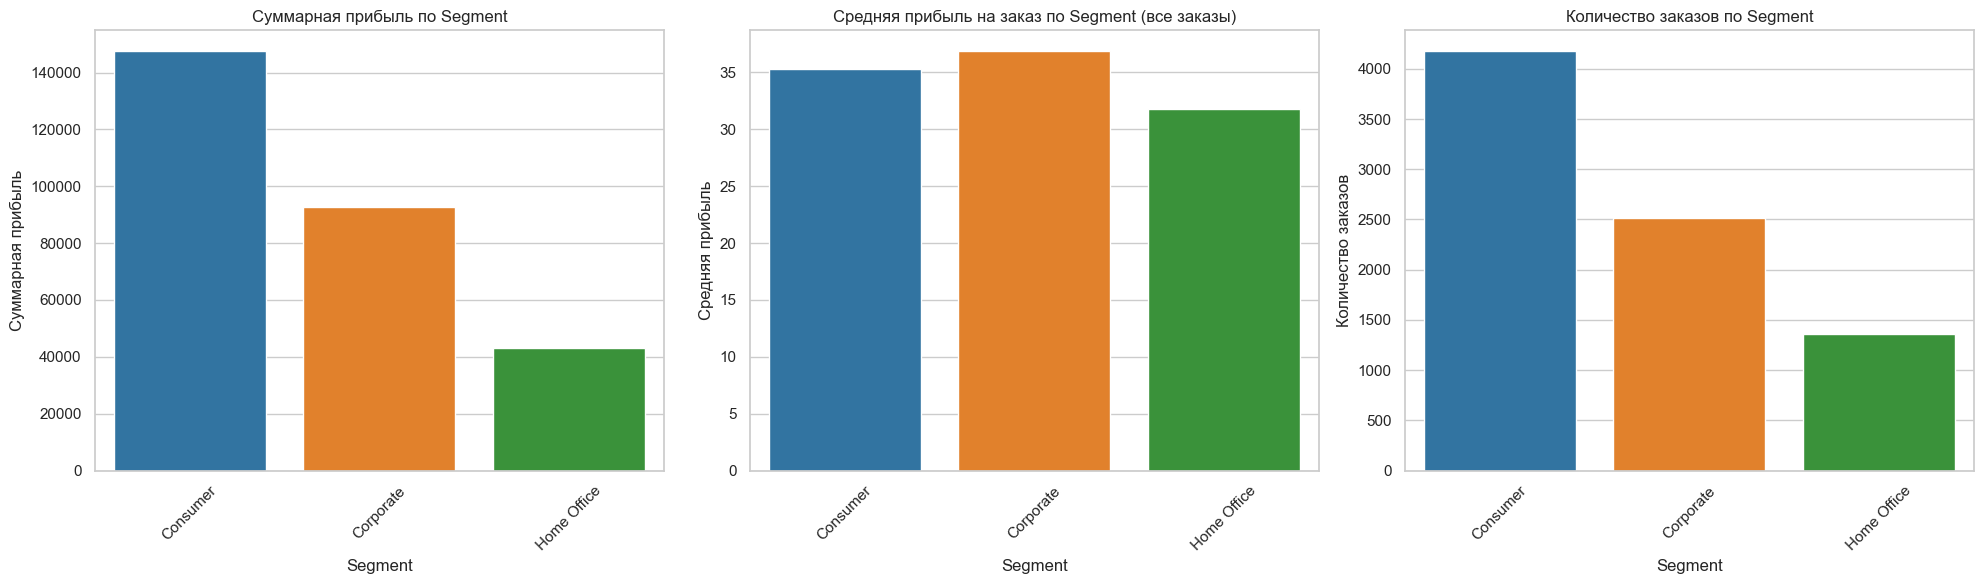


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Segment



üí° –í—ã–≤–æ–¥ –ø–æ 'Segment':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Consumer' ‚Äî 147 447
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Home Office' ‚Äî 43 159
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 31.76 –¥–æ 36.85
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 69.81 –¥–æ 74.29
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Segment' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 1 359 –¥–æ 4 174
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Segment':
  ‚Ä¢ Consumer: 22.21%
  ‚Ä¢ Corporate: 20.45%
  ‚Ä¢ Home Office: 21.56%


In [36]:
analyze_profit_by_category(df, 'Segment')

–°–µ–≥–º–µ–Ω—Ç Consumer (—á–∞—Å—Ç–Ω—ã–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏) –ª–∏–¥–∏—Ä—É–µ—Ç –ø–æ –ø—Ä–∏–±—ã–ª–∏ –±–ª–∞–≥–æ–¥–∞—Ä—è –±–æ–ª—å—à–µ–º—É —á–∏—Å–ª—É –º–µ–ª–∫–∏—Ö –∑–∞–∫–∞–∑–æ–≤ –∏ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏—é –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç–∞, –Ω–æ –∏–∑‚Äë–∑–∞ —Å–∫–∏–¥–æ–∫ –∏ –≤–æ–∑–≤—Ä–∞—Ç–æ–≤ —É –Ω–∏—Ö –≤—ã—à–µ —Ä–∏—Å–∫ —É–±—ã—Ç–æ—á–Ω—ã—Ö —Å–¥–µ–ª–æ–∫. Corporate (–∫–æ—Ä–ø–æ—Ä–∞—Ç–∏–≤–Ω—ã–µ –∫–ª–∏–µ–Ω—Ç—ã) —Å—Ç–∞–±–∏–ª–µ–Ω –≤ –æ–±—ä—ë–º–∞—Ö –∏ –º–∞—Ä–∂–µ, —Ç.–∫. —Ä–∞–±–æ—Ç–∞–µ—Ç –ø–æ –¥–æ–≥–æ–≤–æ—Ä–Ω—ã–º —Ü–µ–Ω–∞–º. Home Office (–¥–æ–º–∞—à–Ω–∏–µ –æ—Ñ–∏—Å—ã) –≥–µ–Ω–µ—Ä–∏—Ä—É–µ—Ç –º–µ–Ω—å—à–µ –ø—Ä–∏–±—ã–ª–∏ –∏–∑‚Äë–∑–∞ –Ω–∏–∑–∫–∏—Ö –∑–∞–∫–∞–∑–Ω—ã—Ö –æ–±—ä—ë–º–æ–≤ –∏ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–Ω–æ–≥–æ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç–∞. –ö–∞–∂–¥—ã–π —Å–µ–≥–º–µ–Ω—Ç —Ç—Ä–µ–±—É–µ—Ç —Å–≤–æ–µ–π —Ü–µ–Ω–æ–≤–æ–π –∏ –∞—Å—Å–æ—Ä—Ç–∏–º–µ–Ω—Ç–Ω–æ–π —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏.


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Ship Mode


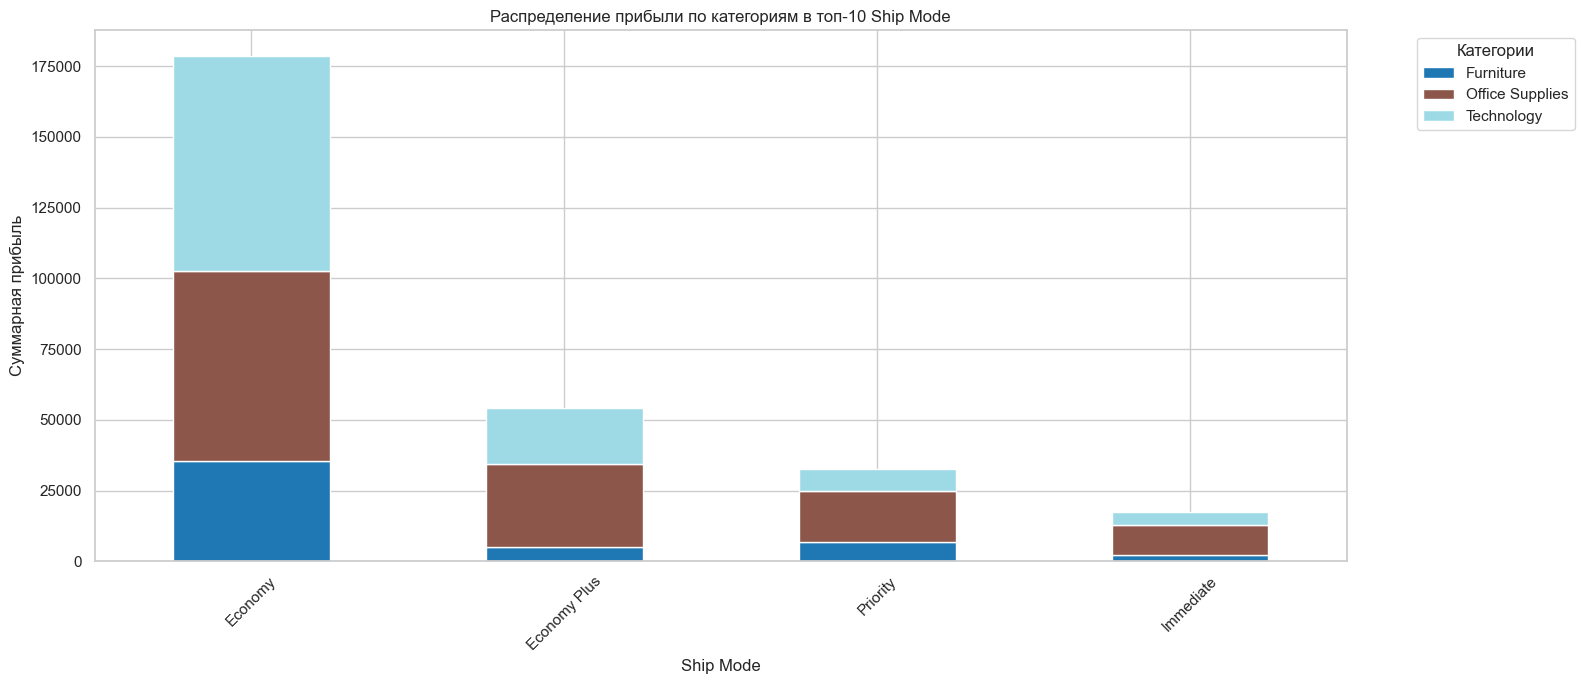


üí° –í—ã–≤–æ–¥ –ø–æ 'Ship Mode':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Economy' ‚Äî 178 696
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Immediate' ‚Äî 17 569
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 27.92 –¥–æ 41.24
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 68.36 –¥–æ 81.70
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Ship Mode' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 426 –¥–æ 4 862
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Ship Mode':
  ‚Ä¢ Economy: 21.74%
  ‚Ä¢ Economy Plus: 21.19%
  ‚Ä¢ Priority: 22.33%
  ‚Ä¢ Immediate: 18.54%


In [37]:
analyze_profit_by_category(df, 'Ship Mode')

Economy —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –¥–µ—à—ë–≤—ã—Ö –æ—Ç–ø—Ä–∞–≤–ª–µ–Ω–∏–π –≤ –∫—Ä—É–ø–Ω—ã—Ö —Ä—ã–Ω–∫–∞—Ö, –ø–æ—ç—Ç–æ–º—É –µ—ë —É–±—ã—Ç–æ—á–Ω–æ—Å—Ç—å ~22% ‚Äî –º–Ω–æ–≥–æ –º–∞–ª—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –∏ –≤–æ–∑–≤—Ä–∞—Ç–æ–≤. Priority (~22%) –∏ Economy‚ÄØPlus (~21%) —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –∫–∞–∫–∞—è-—Ç–∞ –ø—Ä–µ–º–∏—É–º —É—Å–ª—É–≥–∞ –ø–ª–∞—Ç–µ–∂–µ—Å–ø–æ—Å–æ–±–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–∞—Ö, –≥–¥–µ –∫–ª–∏–µ–Ω—Ç—ã –≥–æ—Ç–æ–≤—ã –ø–µ—Ä–µ–ø–ª–∞—á–∏–≤–∞—Ç—å –∑–∞ —Å–∫–æ—Ä–æ—Å—Ç—å –¥–æ—Å—Ç–∞–≤–∫–∏.

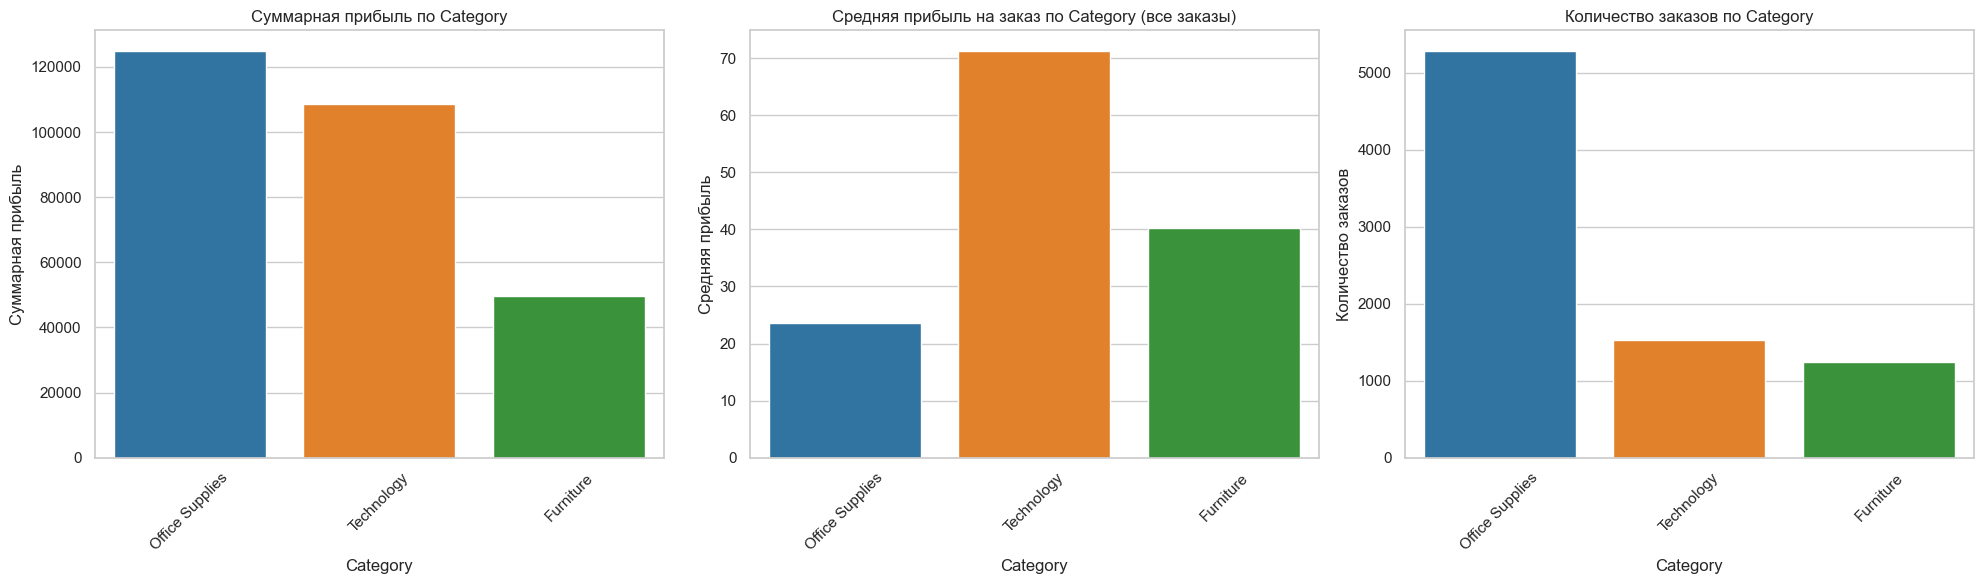


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Category


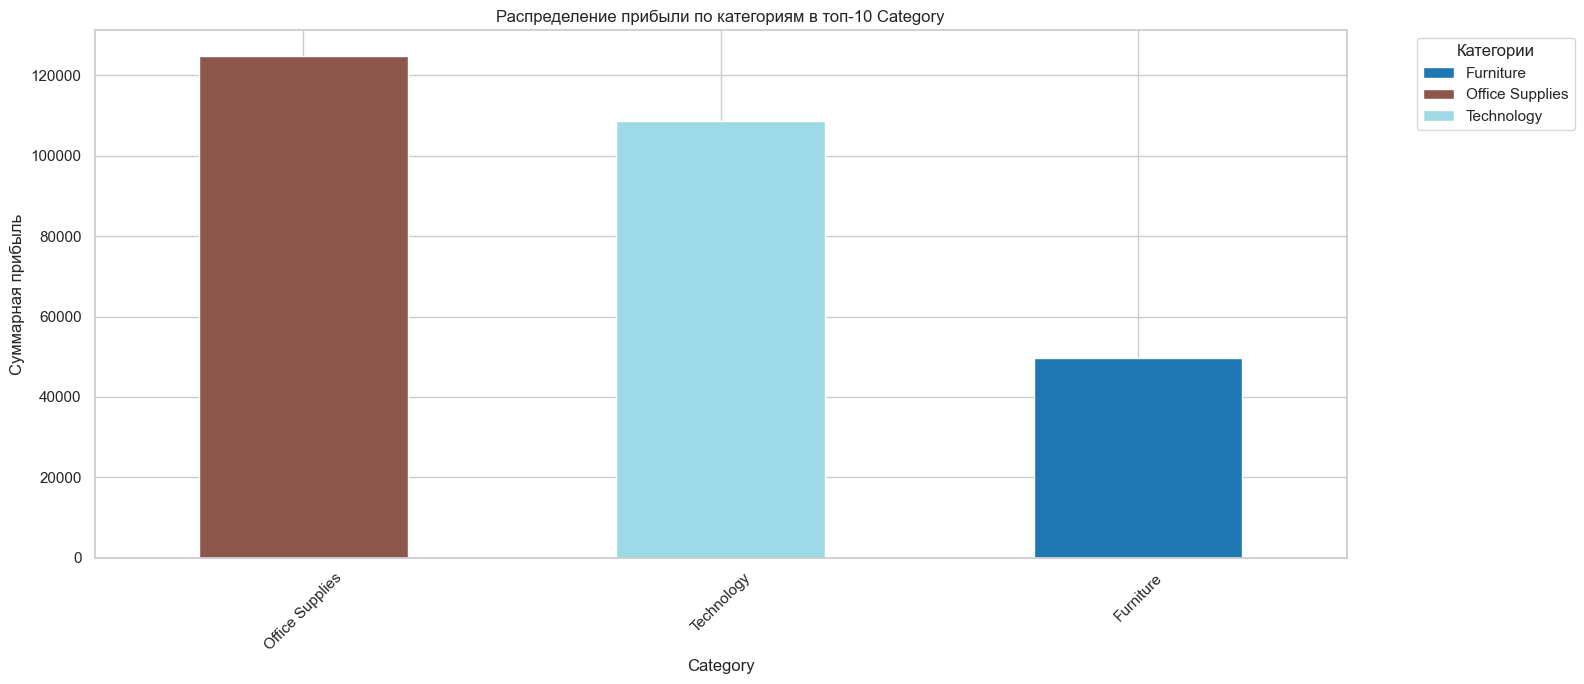


üí° –í—ã–≤–æ–¥ –ø–æ 'Category':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Office Supplies' ‚Äî 124 952
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Furniture' ‚Äî 49 734
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 23.64 –¥–æ 71.28
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 40.46 –¥–æ 151.90
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Category' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 1 238 –¥–æ 5 286
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Category':
  ‚Ä¢ Office Supplies: 18.37%
  ‚Ä¢ Technology: 26.85%
  ‚Ä¢ Furniture: 28.59%


In [38]:
analyze_profit_by_category(df, 'Category')

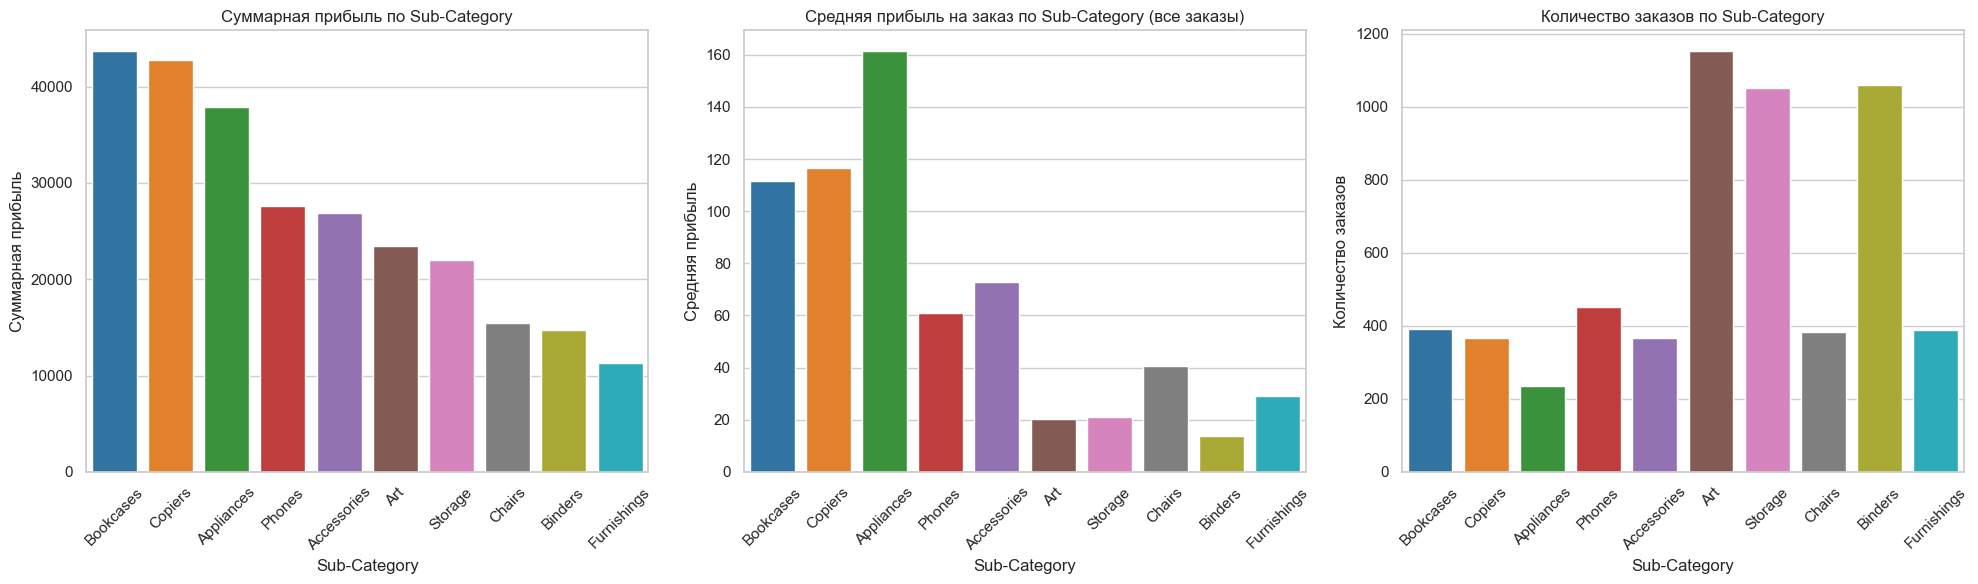


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Sub-Category


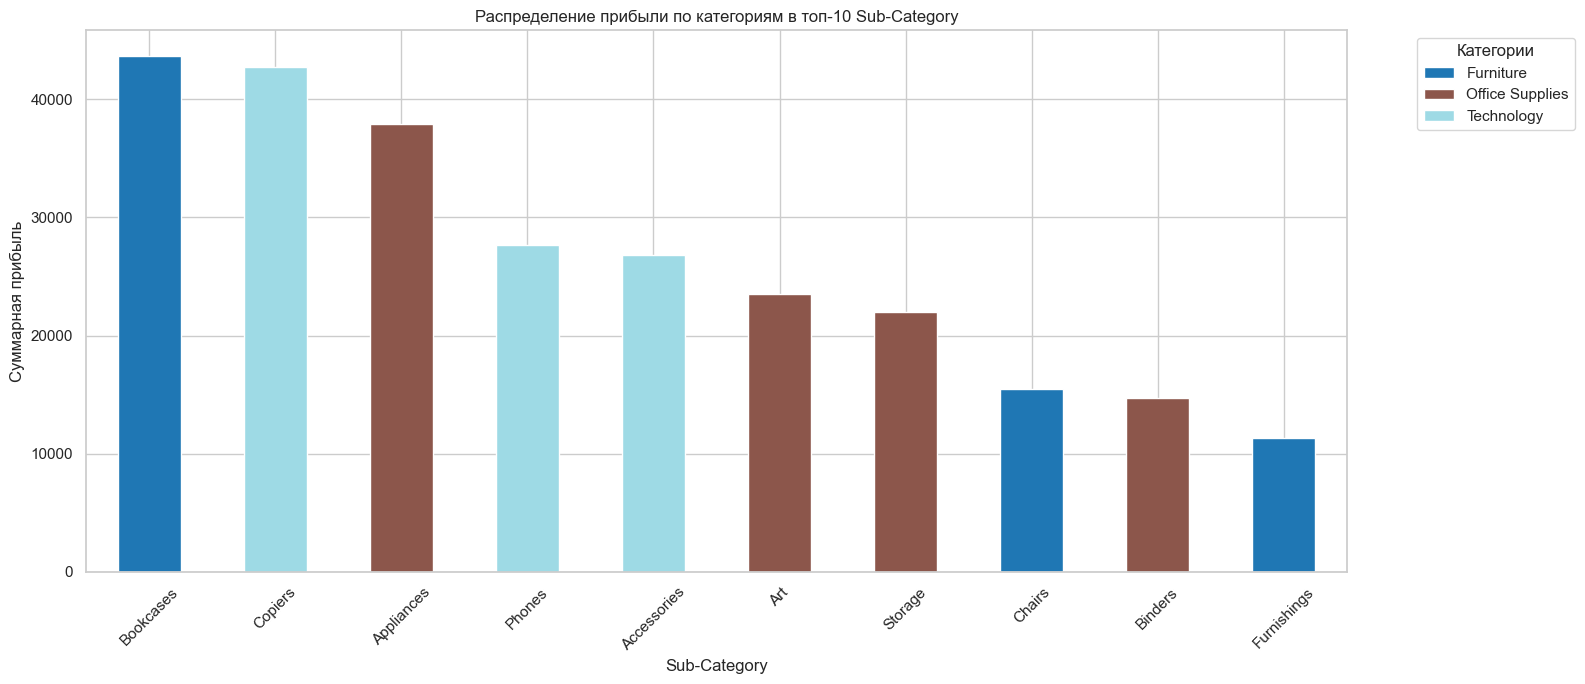


üí° –í—ã–≤–æ–¥ –ø–æ 'Sub-Category':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Bookcases' ‚Äî 43 655
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'Furnishings' ‚Äî 11 321
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 13.88 –¥–æ 161.30
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 20.47 –¥–æ 275.54
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Sub-Category' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 235 –¥–æ 1 152
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Sub-Category':
  ‚Ä¢ Bookcases: 20.20%
  ‚Ä¢ Copiers: 24.25%
  ‚Ä¢ Appliances: 24.68%
  ‚Ä¢ Phones: 34.22%
  ‚Ä¢ Accessories: 12.50%
  ‚Ä¢ Art: 14.32%
  ‚Ä¢ Storage: 34.25%
  ‚Ä¢ Chairs: 37.60%
  ‚Ä¢ Binders: 12.84%
  ‚Ä¢ Furnishings: 19.79%


In [39]:
analyze_profit_by_category(df, 'Sub-Category')

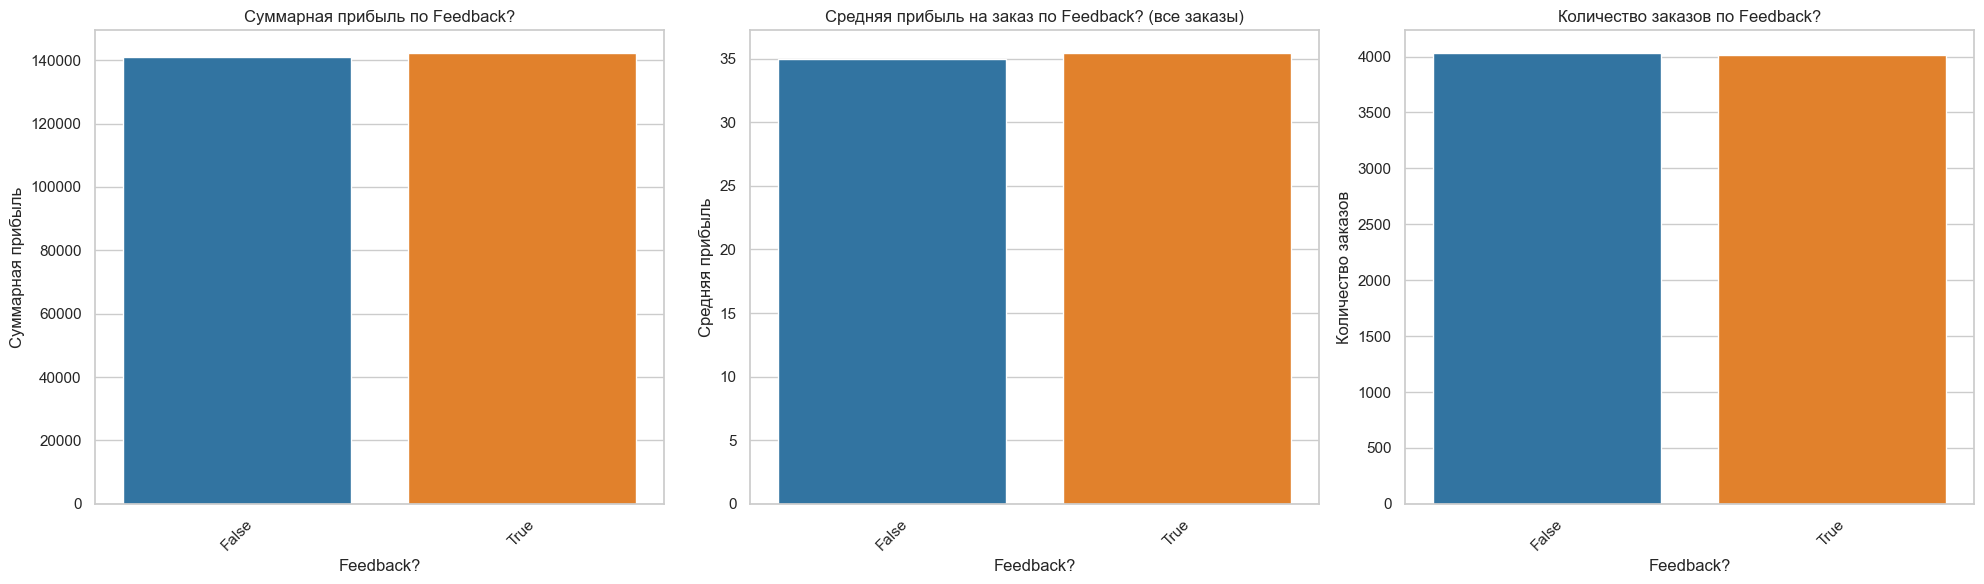


üìä –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º –≤–Ω—É—Ç—Ä–∏ —Ç–æ–ø-10 Feedback?



üí° –í—ã–≤–æ–¥ –ø–æ 'Feedback?':
- –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'True' ‚Äî 142 304
- –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å —É 'False' ‚Äî 140 936
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (–≤—Å–µ –∑–∞–∫–∞–∑—ã) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 34.95 –¥–æ 35.45
- –°—Ä–µ–¥–Ω—è—è –ø—Ä–∏–±—ã–ª—å –Ω–∞ –∑–∞–∫–∞–∑ (—Ç–æ–ª—å–∫–æ –ø—Ä–∏–±—ã–ª—å–Ω—ã–µ) –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 71.89 –¥–æ 74.21
- –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Feedback?' –≤–∞—Ä—å–∏—Ä—É–µ—Ç—Å—è –æ—Ç 4 014 –¥–æ 4 033
- –ü—Ä–æ—Ü–µ–Ω—Ç —É–±—ã—Ç–æ—á–Ω—ã—Ö –∑–∞–∫–∞–∑–æ–≤ –≤ —Ç–æ–ø-10 'Feedback?':
  ‚Ä¢ True: 21.55%
  ‚Ä¢ False: 21.55%


In [40]:
analyze_profit_by_category(df, 'Feedback?')

In [41]:
print(df['Country'].head(10))
print(df['Country'].dtype)


0            Sweden
1    United Kingdom
2            France
3    United Kingdom
4    United Kingdom
5            France
6            France
7            France
8            France
9            France
Name: Country, dtype: object
object


–ß–∞—â–µ –ª—é–¥–∏ –ø–æ–ª–∞–≥–∞—é—Ç—Å—è –Ω–∞ –æ—Ç–∑—ã–≤—ã –ø—Ä–∏ –∑–∞–∫–∞–∑–µ —Ç–æ–≤–∞—Ä–æ–≤, –Ω–æ —É–±—ã—Ç–æ—á–Ω–æ—Å—Ç—å –æ–¥–∏–Ω–∞–∫–æ–≤–æ, —Ç.–∫. –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω–æ –ø–æ–Ω—Ä–∞–≤–∏—Ç—Å—è —á–µ–ª–æ–≤–µ–∫—É —Ç–æ—Ç –∏–ª–∏ –∏–Ω–æ–π —Ç–æ–≤–∞—Ä.

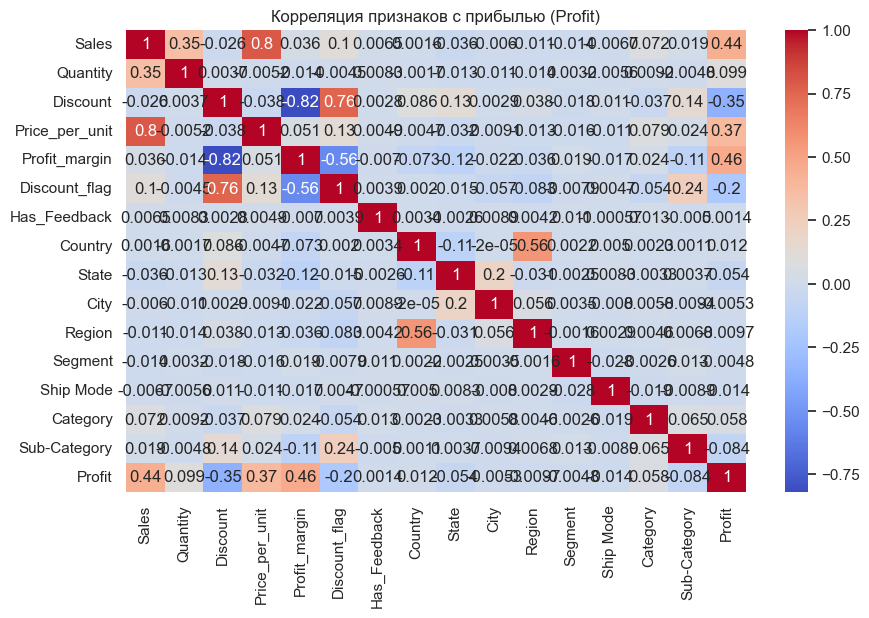


–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Ç–∞—Ä–≥–µ—Ç–æ–º (Profit):
Profit            1.000000
Profit_margin     0.464795
Sales             0.441217
Price_per_unit    0.374914
Quantity          0.098670
Category          0.058219
Country           0.011599
Has_Feedback      0.001421
Segment          -0.004830
City             -0.005330
Region           -0.009716
Ship Mode        -0.014191
State            -0.053529
Sub-Category     -0.083571
Discount_flag    -0.200810
Discount         -0.351328
Name: Profit, dtype: float64


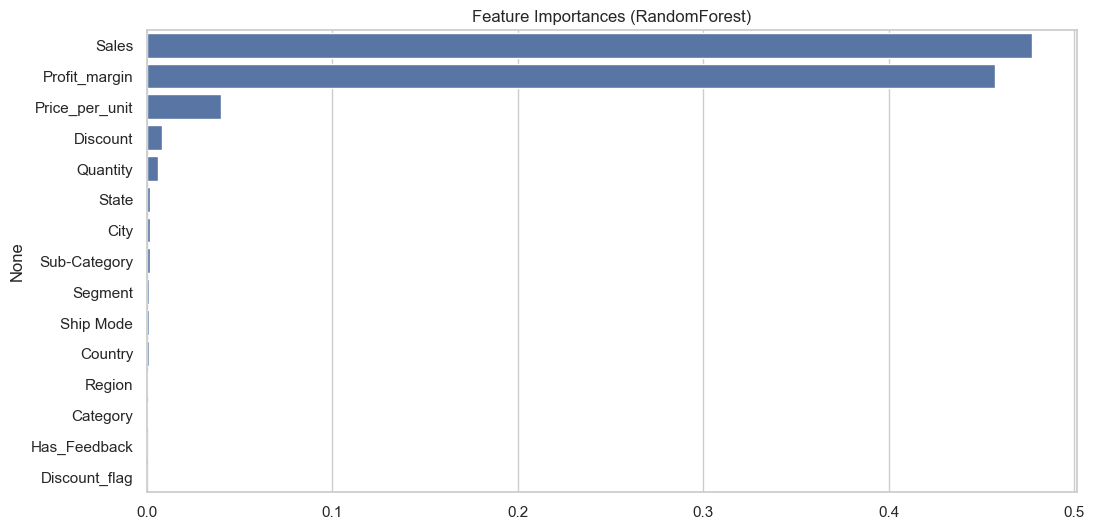

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# --- df —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω

# –î–æ–±–∞–≤–ª—è–µ–º –Ω–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
df['Price_per_unit'] = df['Sales'] / df['Quantity']
df['Profit_margin'] = df['Profit'] / df['Sales']
df['Discount_flag'] = (df['Discount'] > 0).astype(int)
df['Has_Feedback'] = df['Feedback?'].astype(int)

cat_cols = ['Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category']

# –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é df –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π
df_encoded = df.copy()

# –ö–æ–¥–∏—Ä—É–µ–º —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–æ–∫–æ–≤—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤ –∫–æ–ø–∏–∏
for col in cat_cols:
    if col in df_encoded.columns and df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# –§–æ—Ä–º–∏—Ä—É–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –∏–∑ –∫–æ–ø–∏–∏
feature_cols = ['Sales', 'Quantity', 'Discount', 'Price_per_unit', 'Profit_margin', 'Discount_flag', 'Has_Feedback']
feature_cols += [col for col in cat_cols if col in df_encoded.columns]

X = df_encoded[feature_cols].fillna(0)
y = df_encoded['Profit']

# –î–∞–ª–µ–µ –∏—Å–ø–æ–ª—å–∑—É–µ–º X, y –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ –∞–Ω–∞–ª–∏–∑–∞, –∏—Å—Ö–æ–¥–Ω—ã–π df –æ—Å—Ç–∞–Ω–µ—Ç—Å—è –±–µ–∑ –∏–∑–º–µ–Ω–µ–Ω–∏–π

# –ü—Ä–∏–º–µ—Ä –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
plt.figure(figsize=(10,6))
corr = df_encoded[feature_cols + ['Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —Å –ø—Ä–∏–±—ã–ª—å—é (Profit)")
plt.show()

print("\n–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è —Å —Ç–∞—Ä–≥–µ—Ç–æ–º (Profit):")
print(corr['Profit'].sort_values(ascending=False))

# –ü—Ä–æ—Å—Ç–∞—è –º–æ–¥–µ–ª—å –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
rf_simple = RandomForestRegressor(n_estimators=100, random_state=42)
rf_simple.fit(X, y)

importances = rf_simple.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importances (RandomForest)")
plt.show()




In [43]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        8047 non-null   object        
 1   Order Date      8047 non-null   datetime64[ns]
 2   Customer Name   8047 non-null   object        
 3   Country         8047 non-null   object        
 4   State           8047 non-null   object        
 5   City            8047 non-null   object        
 6   Region          8047 non-null   object        
 7   Segment         8047 non-null   object        
 8   Ship Mode       8047 non-null   object        
 9   Category        8047 non-null   object        
 10  Sub-Category    8047 non-null   object        
 11  Product Name    8047 non-null   object        
 12  Discount        8047 non-null   float64       
 13  Sales           8047 non-null   int64         
 14  Profit          8047 non-null   int64         
 15  Quan

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, —á—Ç–æ df –ø–æ–¥–≥–æ—Ç–æ–≤–ª–µ–Ω –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏, –≤–∫–ª—é—á–∞—è:
# 'Region', 'Year', 'Profit', –∏ —á—Ç–æ X, y –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã (–ø—Ä–∏–∑–Ω–∞–∫–∏ –∏ —Ü–µ–ª–µ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è)

# –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω—É–ª—è–º–∏)
X_filled = X.fillna(0)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    'Neural Network (MLP)': MLPRegressor(hidden_layer_sizes=(64,), activation='relu',
                                         solver='adam', max_iter=500, random_state=42)
}

print("–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π:")
for name, model in models.items():
    scores = cross_val_score(model, X_filled, y, cv=cv, scoring='r2')
    cv_results[name] = scores
    print(f"{name}: R¬≤ = {scores.mean():.4f} ¬± {scores.std():.4f}")

best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
print(f"\n–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: {best_model_name} —Å R¬≤ = {cv_results[best_model_name].mean():.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å—Ä–∞–≤–Ω–µ–Ω–∏–π –º–æ–¥–µ–ª–µ–π
names = list(cv_results.keys())
means = [cv_results[name].mean() for name in names]
stds = [cv_results[name].std() for name in names]

plt.figure(figsize=(10,6))
plt.bar(names, means, yerr=stds, capsize=5, color='skyblue')
plt.ylabel('–°—Ä–µ–¥–Ω–µ–µ R¬≤')
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π –ø–æ R¬≤ (5-fold CV)')
plt.ylim(min(0, min(means)-0.1), 1)
plt.grid(axis='y')
plt.xticks(rotation=30)
plt.show()

# --- –ê–Ω–∞–ª–∏–∑ –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω–æ–≥–æ —Ä–µ–≥–∏–æ–Ω–∞ ---

region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

best_region = region_profit.idxmax()
best_region_profit = region_profit.max()

print(f"\nüèÖ –ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–π —Ä–µ–≥–∏–æ–Ω –ø–æ —Å—É–º–º–∞—Ä–Ω–æ–π –ø—Ä–∏–±—ã–ª–∏: {best_region} —Å –ø—Ä–∏–±—ã–ª—å—é {best_region_profit:.2f}")

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞—Ç—ã –∏ —Å–æ–∑–¥–∞–Ω–∏–µ –≥–æ–¥–∞
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Year'] = df['Order Date'].dt.year

# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –ª—É—á—à–µ–º—É —Ä–µ–≥–∏–æ–Ω—É
df_region = df[df['Region'] == best_region]

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –ø—Ä–∏–±—ã–ª—å –ø–æ –≥–æ–¥–∞–º –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
profit_by_year_cat = df_region.groupby(['Year', 'Category'])['Profit'].sum().reset_index()

# –°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å –ø–æ –≥–æ–¥–∞–º –≤ —Ä–µ–≥–∏–æ–Ω–µ
profit_by_year_total = df_region.groupby('Year')['Profit'].sum().reset_index()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞ —Å –ø–ª–∞–≤–Ω—ã–º–∏ –ª–∏–Ω–∏—è–º–∏
plt.figure(figsize=(12,7))

# –õ–∏–Ω–∏–∏ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º
sns.lineplot(data=profit_by_year_cat, x='Year', y='Profit', hue='Category', marker='o', ci=None)

# –°—É–º–º–∞—Ä–Ω–∞—è –ª–∏–Ω–∏—è (—á–µ—Ä–Ω–∞—è —Ç–æ–ª—Å—Ç–∞—è)
plt.plot(profit_by_year_total['Year'], profit_by_year_total['Profit'],
         color='black', marker='o', linewidth=3, label='–°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å')

plt.title(f"–î–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–∏–±—ã–ª–∏ –ø–æ –≥–æ–¥–∞–º –¥–ª—è —Ä–µ–≥–∏–æ–Ω–∞: {best_region}")
plt.xlabel("–ì–æ–¥")
plt.ylabel("–°—É–º–º–∞—Ä–Ω–∞—è –ø—Ä–∏–±—ã–ª—å")
plt.legend(title='–ö–∞—Ç–µ–≥–æ—Ä–∏–∏', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



–ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è –º–æ–¥–µ–ª–µ–π:
Linear Regression: R¬≤ = 0.3974 ¬± 0.0585
Random Forest: R¬≤ = 0.9627 ¬± 0.0323
Gradient Boosting: R¬≤ = 0.9635 ¬± 0.0111
XGBoost: R¬≤ = 0.9546 ¬± 0.0338
Neural Network (MLP): R¬≤ = 0.5984 ¬± 0.0954

–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Gradient Boosting —Å R¬≤ = 0.9635



üèÖ –ù–∞–∏–±–æ–ª–µ–µ –ø—Ä–∏–±—ã–ª—å–Ω—ã–π —Ä–µ–≥–∏–æ–Ω –ø–æ —Å—É–º–º–∞—Ä–Ω–æ–π –ø—Ä–∏–±—ã–ª–∏: Central —Å –ø—Ä–∏–±—ã–ª—å—é 157636.00


–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å: Random Forest —Å R¬≤ = 0.5876


In [45]:
import joblib

# –û–±—É—á–∞–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å –Ω–∞ –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö
best_model = models[best_model_name]
best_model.fit(X_filled, y)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –≤ —Ñ–∞–π–ª
joblib.dump(best_model, 'best_model.pkl')
print(f"–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å '{best_model_name}' —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ —Ñ–∞–π–ª 'best_model.pkl'")


–õ—É—á—à–∞—è –º–æ–¥–µ–ª—å 'Gradient Boosting' —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∞ –≤ —Ñ–∞–π–ª 'best_model.pkl'


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        8047 non-null   object        
 1   Order Date      8047 non-null   datetime64[ns]
 2   Customer Name   8047 non-null   object        
 3   Country         8047 non-null   object        
 4   State           8047 non-null   object        
 5   City            8047 non-null   object        
 6   Region          8047 non-null   object        
 7   Segment         8047 non-null   object        
 8   Ship Mode       8047 non-null   object        
 9   Category        8047 non-null   object        
 10  Sub-Category    8047 non-null   object        
 11  Product Name    8047 non-null   object        
 12  Discount        8047 non-null   float64       
 13  Sales           8047 non-null   int64         
 14  Profit          8047 non-null   int64         
 15  Quan